In [2]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Aqui vamos a cargar el dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sodapy import Socrata
cliente2=Socrata('www.datos.gov.co',None )
result=cliente2.get('bz43-8ahq')
df_delito=pd.DataFrame.from_records(result)
df_delito.head()

,fecha_hecho,cod_depto,departamento,cod_muni,municipio,zona,sexo,cantidad
0,2003-01-01T00:00:00.000,08,ATLÁNTICO,08758,SOLEDAD,URBANA,FEMENINO,1
1,2003-01-01T00:00:00.000,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",URBANA,FEMENINO,7
2,2003-01-01T00:00:00.000,13,BOLÍVAR,13836,TURBACO,RURAL,FEMENINO,1
3,2003-01-01T00:00:00.000,18,CAQUETÁ,18001,FLORENCIA,URBANA,FEMENINO,1
4,2003-01-01T00:00:00.000,19,CAUCA,19001,POPAYAN,URBANA,MASCULINO,1


In [34]:
df_delito=df_delito.dropna(axis=0, how='any')
df_delito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fecha_hecho   1000 non-null   object
 1   cod_depto     1000 non-null   object
 2   departamento  1000 non-null   object
 3   cod_muni      1000 non-null   object
 4   municipio     1000 non-null   object
 5   zona          1000 non-null   object
 6   sexo          1000 non-null   object
 7   cantidad      1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


Para este ejercicio tomé unos datos sobre las victimas de delito sexual durante los primeros 5 meses del 2003, datos son importantes para analizar la poblacion en casos de felitos de feminicidio, abuso a menores de edad, violaciones, entre otros.

In [35]:
df_delito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fecha_hecho   1000 non-null   object
 1   cod_depto     1000 non-null   object
 2   departamento  1000 non-null   object
 3   cod_muni      1000 non-null   object
 4   municipio     1000 non-null   object
 5   zona          1000 non-null   object
 6   sexo          1000 non-null   object
 7   cantidad      1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


1.observamos que los datos 'Cantidad' se encuentran como datos objeto y no como enteros, entonces los pasamos a un dato numerico para poder analizarlos.
2. los datos 'fecha_hecho' tambien se encuentran como datos objeto y debemos pasarlos a fecha para poder graficarlos.
3. tambien vemos que no hay datos nulos y que podemos trabajar con el dataset original

In [36]:
Cantidad=pd.to_numeric(df_delito['cantidad'],errors='coerce')
print(Cantidad)

0      1
1      7
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: cantidad, Length: 1000, dtype: int64


In [37]:
Fecha1=pd.to_datetime(df_delito['fecha_hecho'], errors='raise', dayfirst=False, yearfirst=True, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
print(Fecha1)

0     2003-01-01
1     2003-01-01
2     2003-01-01
3     2003-01-01
4     2003-01-01
         ...    
995   2003-05-07
996   2003-05-07
997   2003-05-07
998   2003-05-07
999   2003-05-08
Name: fecha_hecho, Length: 1000, dtype: datetime64[ns]


In [38]:
df_delito['Cantidad']=Cantidad
df_delito['Fecha']=Fecha1
df_delito

,fecha_hecho,cod_depto,departamento,cod_muni,municipio,zona,sexo,cantidad,Cantidad,Fecha
0,2003-01-01T00:00:00.000,08,ATLÁNTICO,08758,SOLEDAD,URBANA,FEMENINO,1,1,2003-01-01
1,2003-01-01T00:00:00.000,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",URBANA,FEMENINO,7,7,2003-01-01
2,2003-01-01T00:00:00.000,13,BOLÍVAR,13836,TURBACO,RURAL,FEMENINO,1,1,2003-01-01
3,2003-01-01T00:00:00.000,18,CAQUETÁ,18001,FLORENCIA,URBANA,FEMENINO,1,1,2003-01-01
4,2003-01-01T00:00:00.000,19,CAUCA,19001,POPAYAN,URBANA,MASCULINO,1,1,2003-01-01
...,...,...,...,...,...,...,...,...,...,...
995,2003-05-07T00:00:00.000,68,SANTANDER,68001,BUCARAMANGA,URBANA,FEMENINO,1,1,2003-05-07
996,2003-05-07T00:00:00.000,68,SANTANDER,68276,FLORIDABLANCA,URBANA,FEMENINO,1,1,2003-05-07
997,2003-05-07T00:00:00.000,68,SANTANDER,68406,LEBRIJA,URBANA,MASCULINO,1,1,2003-05-07
998,2003-05-07T00:00:00.000,76,VALLE DEL CAUCA,76890,YOTOCO,RURAL,FEMENINO,1,1,2003-05-07


Creamos 2 columnas con los datos que cambiamos, la fecha y la cantidad y ahora pasamos a analizarlos.




In [ ]:
df_delito['Year'] = df_delito['Fecha'].dt.year
print(df_delito)

                 fecha_hecho cod_depto     departamento cod_muni  \
0    2003-01-01T00:00:00.000        08        ATLÁNTICO    08758   
1    2003-01-01T00:00:00.000        11      BOGOTÁ D.C.    11001   
2    2003-01-01T00:00:00.000        13          BOLÍVAR    13836   
3    2003-01-01T00:00:00.000        18          CAQUETÁ    18001   
4    2003-01-01T00:00:00.000        19            CAUCA    19001   
..                       ...       ...              ...      ...   
995  2003-05-07T00:00:00.000        68        SANTANDER    68001   
996  2003-05-07T00:00:00.000        68        SANTANDER    68276   
997  2003-05-07T00:00:00.000        68        SANTANDER    68406   
998  2003-05-07T00:00:00.000        76  VALLE DEL CAUCA    76890   
999  2003-05-08T00:00:00.000        05        ANTIOQUIA    05101   

          municipio    zona       sexo cantidad  Cantidad      Fecha  Year  
0           SOLEDAD  URBANA   FEMENINO        1         1 2003-01-01  2003  
1      BOGOTA, D.C.  URBANA  

In [ ]:
df_delito.describe()

,Cantidad,Year
count,1000.000000,1000.0
mean,1.328000,2003.0
std,0.906221,0.0
min,1.000000,2003.0
25%,1.000000,2003.0
50%,1.000000,2003.0
75%,1.000000,2003.0
max,10.000000,2003.0


In [ ]:
#agrupamos las cantidades para ver mejor los datos
df_delito['Mes']=df_delito['Fecha'].dt.to_period('M')
df_dpormes = df_delito.groupby('Mes')['Cantidad'].sum().reset_index()
print(df_dpormes)

       Mes  Cantidad
0  2003-01       278
1  2003-02       318
2  2003-03       330
3  2003-04       318
4  2003-05        84


In [10]:
df_dpordepa = df_delito.groupby('departamento')['Cantidad'].sum().reset_index()
df_dpordepa1 = df_dpordepa.sort_values('Cantidad', ascending=False)
print(df_dpordepa1)

          departamento  Cantidad
3          BOGOTÁ D.C.       364
1            ANTIOQUIA       139
24           SANTANDER       123
2            ATLÁNTICO        97
12        CUNDINAMARCA        77
26              TOLIMA        77
13             CÓRDOBA        54
27     VALLE DEL CAUCA        43
20  NORTE DE SANTANDER        38
15               HUILA        36
6               CALDAS        34
18                META        32
10               CESAR        29
4              BOLÍVAR        25
22             QUINDÍO        23
23           RISARALDA        22
19              NARIÑO        20
17           MAGDALENA        15
5               BOYACÁ        14
9                CAUCA        13
8             CASANARE        11
16          LA GUAJIRA         9
11               CHOCÓ         8
25               SUCRE         7
0             AMAZONAS         6
21            PUTUMAYO         5
7              CAQUETÁ         4
14            GUAVIARE         3


En este punto lo que queremos  es agrupar los datos, los agrupamos por departamento y graficamos.

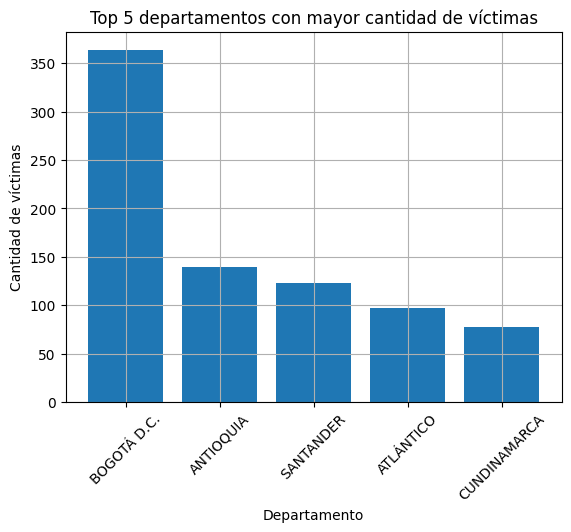

In [11]:
N=5
top_departamentos=df_dpordepa1.head(N)
plt.bar(top_departamentos['departamento'], top_departamentos['Cantidad'])
plt.xlabel('Departamento')
plt.ylabel('Cantidad de víctimas')
plt.title('Top {} departamentos con mayor cantidad de víctimas'.format(N))
plt.grid()
plt.xticks(rotation=45)
plt.show()

En este grafica podemos observar que el departamento con mas victimas en los primeros años  del 2003 fue el distrito capital, el segundo es Antioquia pero como una cifra de mas del doble de casos registrados, este tipo de datos deberia alertar a la alcaldia de la capital pues el unico departamento con las de 350 casos por año,

In [ ]:
print('El valor de la media por deparatmento  es:     ', round(np.mean(df_dpordepa['Cantidad']),3))
print('El valor de la Mediana por deparatmento es:     ', round(np.median(df_dpordepa['Cantidad']),3))
print('El valor de la Desviacion estandar por deparatmento es:     ', round(np.std(df_dpordepa['Cantidad']),3))
print('El valor del Maximo por deparatmento es:     ', round(np.max(df_dpordepa['Cantidad']),3))
print('El valor del Minimo por deparatmento es:     ', round(np.min(df_dpordepa['Cantidad']),3))
print('El valor del Rango por deparatmento es:     ', round(np.max(df_dpordepa['Cantidad']),3)- round(np.min(df_dpordepa['Cantidad']),3))


El valor de la media por deparatmento  es:      47.429
El valor de la Mediana por deparatmento es:      24.0
El valor de la Desviacion estandar por deparatmento es:      70.403
El valor del Maximo por deparatmento es:      364
El valor del Minimo por deparatmento es:      3
El valor del Rango por deparatmento es:      361


        sexo  Cantidad
0   FEMENINO      1132
1  MASCULINO       196


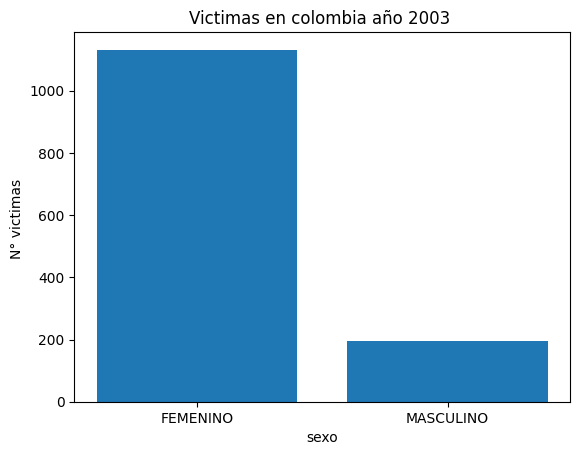

In [ ]:
df_dporsexo = df_delito.groupby('sexo')['Cantidad'].sum().reset_index()
print(df_dporsexo)
var=list(df_delito['Cantidad'])
tiempo=list(df_delito['Fecha'])
dep=list(df_delito['departamento'])
sexo=list(df_delito['sexo'])
plt.bar (df_dporsexo['sexo'], df_dporsexo['Cantidad'])
plt.title('Victimas en colombia año 2003 ')
plt.xlabel('sexo')
plt.ylabel('N° victimas ')
plt.show()

En este grafico podemos ver lo inevitable y este las mujeres son las mayores victimas cuando se hablan violaciones y maltrato, superando a los hombre 5 veces mas.

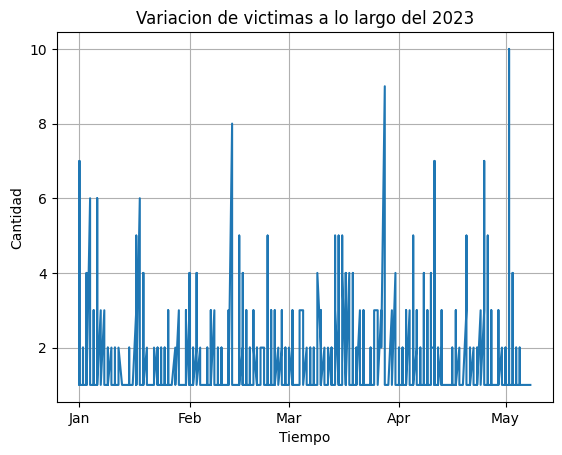

In [13]:
data_v=df_delito.sort_values(by=['Fecha'])
var=list(df_delito['Cantidad'])
tiempo=list(df_delito['Fecha'])
dep=list(df_delito['departamento'])
sexo=list(df_delito['sexo'])
plt.plot(tiempo,var)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.title('Variacion de victimas a lo largo del 2023')
plt.grid()
plt.show()

En esta grafica podemos ver en un periodo de tiempo cada mes hay mas 6 casos por dia en el pais, vemos picos muy altos donde ha llegado hasta tener 10 casos en menos de una semana, pero siempre hay una constante donde no bajamos de 2 casi por dia.

In [14]:
df_dporl = df_delito.groupby('zona')['Cantidad'].sum().reset_index()
print(df_dporl)

     zona  Cantidad
0   RURAL       115
1  URBANA      1213


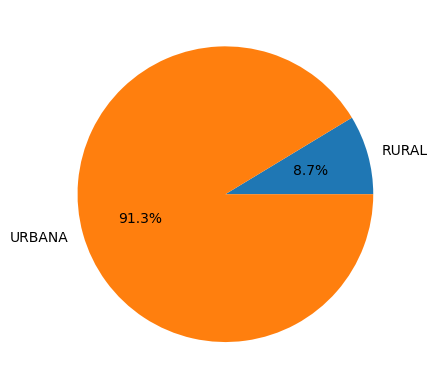

In [25]:
#Diagrama de sectores
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(df_dporl['Cantidad'], labels=df_dporl['zona'], autopct='%1.1f%%')
plt.show()

En este diagrama de sectores se puede observar que en los datos que tenemos el 91,3% OERTENECE A LA ZONA URBANA, y es totalmente coherente con los demas graficos, ya que Bogota en su mayor parte es una zona Urbana y es el lugar con mayor numero de victimas.

In [26]:
#punto 9
#Tabla Pivote
df_delito.head()


,fecha_hecho,cod_depto,departamento,cod_muni,municipio,zona,sexo,cantidad,Cantidad,Fecha
0,2003-01-01T00:00:00.000,08,ATLÁNTICO,08758,SOLEDAD,URBANA,FEMENINO,1,1,2003-01-01
1,2003-01-01T00:00:00.000,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",URBANA,FEMENINO,7,7,2003-01-01
2,2003-01-01T00:00:00.000,13,BOLÍVAR,13836,TURBACO,RURAL,FEMENINO,1,1,2003-01-01
3,2003-01-01T00:00:00.000,18,CAQUETÁ,18001,FLORENCIA,URBANA,FEMENINO,1,1,2003-01-01
4,2003-01-01T00:00:00.000,19,CAUCA,19001,POPAYAN,URBANA,MASCULINO,1,1,2003-01-01


In [47]:
from numpy.ma.extras import column_stack
df_delito.pivot_table(values='Cantidad',index= 'departamento', columns=['sexo'] , aggfunc='count' )


sexo,FEMENINO,MASCULINO
departamento,,
AMAZONAS,4.0,2.0
ANTIOQUIA,91.0,21.0
ATLÁNTICO,56.0,19.0
BOGOTÁ D.C.,115.0,30.0
BOLÍVAR,21.0,3.0
BOYACÁ,11.0,3.0
CALDAS,26.0,7.0
CAQUETÁ,4.0,NaN
CASANARE,11.0,NaN
